In [2]:
print('hello')

hello


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/kaggle/input/garbage-dataset/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 8369 images belonging to 9 classes.


In [5]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

2023-02-10 14:22:38.311451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 14:22:38.385938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 14:22:38.386689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 14:22:38.388441: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 3s 0us/step


In [8]:
for layer in vgg16.layers:
    layer.trainable = False

In [9]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [10]:
prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-02-10 14:23:14.599238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/28


2023-02-10 14:23:16.736506: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


262/262 [==============================] - 191s 694ms/step - loss: 1.9523 - accuracy: 0.3395
Epoch 2/28
262/262 [==============================] - 160s 612ms/step - loss: 1.5704 - accuracy: 0.4575
Epoch 3/28
262/262 [==============================] - 159s 607ms/step - loss: 1.4652 - accuracy: 0.4922
Epoch 4/28
262/262 [==============================] - 159s 605ms/step - loss: 1.3998 - accuracy: 0.5229
Epoch 5/28
262/262 [==============================] - 158s 605ms/step - loss: 1.3115 - accuracy: 0.5481
Epoch 6/28
262/262 [==============================] - 158s 602ms/step - loss: 1.3178 - accuracy: 0.5502
Epoch 7/28
262/262 [==============================] - 158s 601ms/step - loss: 1.2308 - accuracy: 0.5784
Epoch 8/28
262/262 [==============================] - 161s 615ms/step - loss: 1.2259 - accuracy: 0.5781
Epoch 9/28
262/262 [==============================] - 166s 632ms/step - loss: 1.1575 - accuracy: 0.6031
Epoch 10/28
262/262 [==============================] - 157s 599ms/step - lo

In [12]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
    test_image = image.load_img(new_image, target_size = (224,224))
    plt.axis("off")
    plt.imshow(test_image)
    plt.show()
 
    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)

    predicted_array = model.predict(test_image)
    predicted_value = output_class[np.argmax(predicted_array)]
    predicted_accuracy = round(np.max(predicted_array) * 100, 2)

    print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

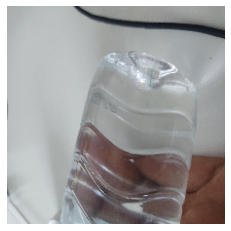

Your waste material is  metal  with  95.7  % accuracy


In [26]:
import matplotlib.pyplot as plt
waste_prediction("/kaggle/input/test-data/Test data/test2.jpg")

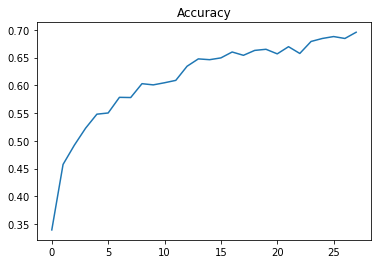

In [27]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

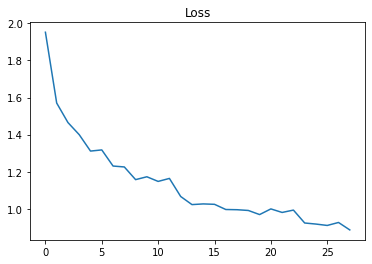

In [28]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [29]:
model.save("classifyWaste_v3.h5")